<a href="https://colab.research.google.com/github/FabioLofredo/Exercises-for-Data-Science/blob/main/Python_Pandas_Numpy_Matplotlib_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Pandas


##Series

https://pandas.pydata.org/docs/reference/api/pandas.Series.html

In [ ]:
#Exemplo básico
x = [10,20,30] # funciona com tuplas, mas não funciona com set
serie = pd.Series(x)
print(serie)
print(serie[0])
print(type(serie))
print(serie.value_counts())
#não funciona iloc nem loc: print(serie.iloc(2))
print(serie.dtype)


0    10
1    20
2    30
dtype: int64
10
<class 'pandas.core.series.Series'>
10    1
20    1
30    1
dtype: int64
int64


In [ ]:
#Com nome
x = [10,20,30] # funciona com tuplas, mas não funciona com set
serie = pd.Series(x, name="valores")
print(serie)

0    10
1    20
2    30
Name: valores, dtype: int64


In [ ]:
#Com índice e valores
x = [10,20,30] # funciona com tuplas, mas não funciona com set
y = ["a","b","c"] # funcionar com tuplas e set
serie = pd.Series(x,index = y)
print(serie)
print(serie["a"]) #gera erro: print(serie[0]]) 

a    10
b    20
c    30
dtype: int64
10


In [ ]:
#Com dicionário
x = {10:"a",20:"b",30:"c"} #funciona diferente: x = {'letras':["a","b","c","d","e"],'valores':[10,20,30,40,50]}
serie = pd.Series(x)
print(serie)

10    a
20    b
30    c
dtype: object


In [ ]:
#Com numpy
x = np.arange(5)
y = np.random.randint(10, size= 5)
serie = pd.Series(y, index= x)
print(serie)

0    2
1    7
2    4
3    5
4    8
dtype: int64


##DataFrame

https://pandas.pydata.org/docs/reference/frame.html

In [ ]:
#Exemplo básico
x = ["a","b","c"]
df = pd.DataFrame(x)
print(df)
print("---1---")
print(df.loc[1])
print("---2---")
print(df.loc[[0,1]])
print("---3---")
print(df.iloc[1])

   0
0  a
1  b
2  c
---1---
0    b
Name: 1, dtype: object
---2---
   0
0  a
1  b
---3---
0    b
Name: 1, dtype: object


In [ ]:
#Exemplo básico com index
y = ["a","b","c"]
x = [10,20,30]
df = pd.DataFrame(x,index=y)
print(df)
print("---1---")
print(df.loc["a"])

    0
a  10
b  20
c  30
---1---
0    10
Name: a, dtype: int64


In [ ]:
#Exemplo dicionário
x = {'letras':["a","b","c"],'valores':[10,20,30]}
df = pd.DataFrame(x)
print(df)
y = {'letras':['a'],'valores':[10]}#só funciona se definir também um index: y = {'letras':'a','valores':10}
df2 = pd.DataFrame(y)
print(df2)

  letras  valores
0      a       10
1      b       20
2      c       30
  letras  valores
0      a       10


In [ ]:
#formas diferentes de criar
sales = {'Jones': 10000,
         'Chris': 5000,
         'Piyush': 440,
         'Meera': 6700,
         'Rahul': 300
        }
serie = pd.Series(sales)
df = pd.DataFrame(sales.values(),index = sales.keys())
df.rename(columns ={0:'sales'},inplace=True)
print(df)
df = pd.DataFrame(serie)
df.rename(columns ={0:'sales'},inplace=True)
print(df)
df = pd.DataFrame.from_dict(sales,orient="index",columns=["sales"])
print(df)

        sales
Jones   10000
Chris    5000
Piyush    440
Meera    6700
Rahul     300
        sales
Jones   10000
Chris    5000
Piyush    440
Meera    6700
Rahul     300
        sales
Jones   10000
Chris    5000
Piyush    440
Meera    6700
Rahul     300


In [ ]:
#mudando index
x = {'letras':["a","b","c"],'var1':[1,2,3],'var2':[10,20,30],'var3':[100,200,300]}
y = ["d1", "d2", "d3"]
df = pd.DataFrame(x, index = y)
print(df) 
print("---1---")
print(df.loc["d1"]) 
print(df.iloc[0])
print("---2---")   
print(df["var1"]) #selecionando coluna
print("---3---")   
print(df[["var2","var3"]]) #selecionando colunas


   letras  var1  var2  var3
d1      a     1    10   100
d2      b     2    20   200
d3      c     3    30   300
---1---
letras      a
var1        1
var2       10
var3      100
Name: d1, dtype: object
letras      a
var1        1
var2       10
var3      100
Name: d1, dtype: object
---2---
d1    1
d2    2
d3    3
Name: var1, dtype: int64
---3---
    var2  var3
d1    10   100
d2    20   200
d3    30   300


In [ ]:
#adicionar e tirar 
col = ["C1","C2","C3"]
row = ["R1","R2","R3","R4","R5"]
df = pd.DataFrame(np.random.randn(5,3), index=row, columns=col)
print(df)
df["NewC"]= np.random.randn(5,1)
df["NewC2"]= df["C1"]*2
print(df)
df.drop("C1",axis=1,inplace=True) # df2 = df.drop("C1",axis=1)
print(df)
df.drop("R1",axis=0,inplace=True)
print(df)
df.loc[len(df)] = [1,2,3,4] #adicionar linha
df.loc[len(df)] = [2,4,8,4] #adicionar linha
print(df)
pd.DataFrame.value_counts
df.describe()

for index_data,values_data in df.iterrows():
  print(index_data)

          C1        C2        C3
R1 -0.778336 -1.388078  0.277999
R2 -0.996970 -1.082015 -0.141732
R3 -0.588678  1.113262 -0.462413
R4  0.814916  0.613203  0.894679
R5 -0.322926 -0.534100 -1.263532
          C1        C2        C3      NewC     NewC2
R1 -0.778336 -1.388078  0.277999 -0.351360 -1.556671
R2 -0.996970 -1.082015 -0.141732  0.766752 -1.993940
R3 -0.588678  1.113262 -0.462413 -2.168540 -1.177357
R4  0.814916  0.613203  0.894679 -0.860277  1.629832
R5 -0.322926 -0.534100 -1.263532 -0.804343 -0.645853
          C2        C3      NewC     NewC2
R1 -1.388078  0.277999 -0.351360 -1.556671
R2 -1.082015 -0.141732  0.766752 -1.993940
R3  1.113262 -0.462413 -2.168540 -1.177357
R4  0.613203  0.894679 -0.860277  1.629832
R5 -0.534100 -1.263532 -0.804343 -0.645853
          C2        C3      NewC     NewC2
R2 -1.082015 -0.141732  0.766752 -1.993940
R3  1.113262 -0.462413 -2.168540 -1.177357
R4  0.613203  0.894679 -0.860277  1.629832
R5 -0.534100 -1.263532 -0.804343 -0.645853
          C

In [ ]:
#reset index
col = ["C1","C2","C3"]
row = ["R1","R2","R3","R4","R5"]
df = pd.DataFrame(np.random.randn(5,3), index=row, columns=col)
print(df)
print(df.index)
print(df.columns)
print('---0---')

# coluna para index
#df.set_index("C3",inplace=True) 

#renomear
#df.rename(columns={"C1":"CC1","C2":"CC2"},index={'R1':'RR1'},inplace=True) 


print(df)


          C1        C2        C3
R1 -1.968312  0.222136 -0.090069
R2 -0.561146 -1.383198 -0.975623
R3  1.160928  0.278795 -0.819413
R4 -1.492037  0.233557 -1.104169
R5 -0.482193  2.302356  1.120708
Index(['R1', 'R2', 'R3', 'R4', 'R5'], dtype='object')
Index(['C1', 'C2', 'C3'], dtype='object')
---0---
          C1        C2        C3
R1 -1.968312  0.222136 -0.090069
R2 -0.561146 -1.383198 -0.975623
R3  1.160928  0.278795 -0.819413
R4 -1.492037  0.233557 -1.104169
R5 -0.482193  2.302356  1.120708


##Playing with data

In [ ]:

x = {'letras':["a",None,"c",None,None],'var1':[1,2,3,4,None],'var2':[10,20,30,40,None],'var3':[100,200,300,400,None],'date':["10/10/10","11/11/11",'12/12/12','13/01/13','14/02/14']}
y = ["d1", "d2",None,None, "d3"]
df = pd.DataFrame(x, index = y)
print(df)
print('---0---')
df['date']= pd.to_datetime(df['date'])
print('---1---')
print(df)
print('---2---')
#print(df.tail(2))
#print(df.head(2))
#df.fillna(1)
#df.dropna()
#df.dropna(subset=['var1'], inplace = True)
#print(df.isna())
#print(df.isnull())
#print(df.isnull().sum())
#print(df.describe())
#print(df.describe().T)
#print(df['var2'].max())
#print(df[["var1","var2","var3"]]["var2"])
#print(df[df['var2']>20])

#print(df[(df['var2']>20) & (df["var3"]>300)])
#print(df.sort_values(by="var2",ascending=False))
#print(df.sort_index())
#print(df.groupby("letras").count()) # funciona com .sum() .mean()
print("---3---")
#print(df["letras"].value_counts())
#print(df.groupby("letras"))
#print(df.info())



#print(df)

    letras  var1  var2   var3      date
d1       a   1.0  10.0  100.0  10/10/10
d2    None   2.0  20.0  200.0  11/11/11
NaN      c   3.0  30.0  300.0  12/12/12
NaN   None   4.0  40.0  400.0  13/01/13
d3    None   NaN   NaN    NaN  14/02/14
---0---
---1---
    letras  var1  var2   var3       date
d1       a   1.0  10.0  100.0 2010-10-10
d2    None   2.0  20.0  200.0 2011-11-11
NaN      c   3.0  30.0  300.0 2012-12-12
NaN   None   4.0  40.0  400.0 2013-01-13
d3    None   NaN   NaN    NaN 2014-02-14
---2---
---3---


In [ ]:
#formas diferentes de criar
d1 = {'aaa': 100,'bbb': 200,'ccc': 300,'ddd': 400,'eee': 500}
d2 = {'aaa': 'Zzz',"BBB": 'Www','CCC': 'Yyy','DDD': 'Xxx','EEE': 'Çcc'}
df1 = pd.DataFrame.from_dict(d1,orient="index",columns=["DF1"])
df2 = pd.DataFrame.from_dict(d2,orient="index",columns=["DF2"])
print(df1)
print(df2)
print("--------")
print(df2.join(df1, how='left'))
print(df2.join(df1, how='right'))
print("--------")
print(df2.join(df1, how='inner'))
print(df2.join(df1, how='outer'))

     DF1
aaa  100
bbb  200
ccc  300
ddd  400
eee  500
     DF2
aaa  Zzz
BBB  Www
CCC  Yyy
DDD  Xxx
EEE  Çcc
--------
     DF2    DF1
aaa  Zzz  100.0
BBB  Www    NaN
CCC  Yyy    NaN
DDD  Xxx    NaN
EEE  Çcc    NaN
     DF2  DF1
aaa  Zzz  100
bbb  NaN  200
ccc  NaN  300
ddd  NaN  400
eee  NaN  500
--------
     DF2  DF1
aaa  Zzz  100
     DF2    DF1
BBB  Www    NaN
CCC  Yyy    NaN
DDD  Xxx    NaN
EEE  Çcc    NaN
aaa  Zzz  100.0
bbb  NaN  200.0
ccc  NaN  300.0
ddd  NaN  400.0
eee  NaN  500.0


## Join Merge

In [ ]:
#concatenar
df1 = pd.DataFrame({'a':[1,2,3],'b':[4,5,6],'c':[7,8,9]})
df2 = pd.DataFrame({'b':[10,20,30],'c':[40,50,60],'d':[70,80,90]})
print(pd.concat([df1,df2]))
print(pd.concat([df1,df2],axis=1))

     a   b   c     d
0  1.0   4   7   NaN
1  2.0   5   8   NaN
2  3.0   6   9   NaN
0  NaN  10  40  70.0
1  NaN  20  50  80.0
2  NaN  30  60  90.0
   a  b  c   b   c   d
0  1  4  7  10  40  70
1  2  5  8  20  50  80
2  3  6  9  30  60  90


In [ ]:
df1 = pd.DataFrame({'a':[1,2,3],'b':[4,5,6],'c':[7,8,1],'d':[10,11,12]})
df2 = pd.DataFrame({'c':[1,3,4],'d':[10,50,60],'e':[4,4,90]})
print("---0---")
print(df1)
print(df2)
print("---1---")
print(df1.set_index("a"))
print(df2.set_index("c"))
print("---2---")
print(df1.set_index("a").join(df2.set_index("c"), lsuffix='_caller', rsuffix='_other',how = 'left'))
print(df1.set_index("a").join(df2.set_index("c"), lsuffix='_caller', rsuffix='_other',how = 'right'))
print("---3---")
print(df1.set_index("a").join(df2.set_index("c"), lsuffix='_caller', rsuffix='_other',how = 'inner'))
print(df1.set_index("a").join(df2.set_index("c"), lsuffix='_caller', rsuffix='_other',how = 'outer'))
print("---4---")
df1 = pd.DataFrame({'a':[1,2,3],'b':[4,5,6],'c':[7,8,1],'d':[10,11,12]})
df2 = pd.DataFrame({'c':[1,1,1],'d':[10,50,60],'e':[4,4,90]})
print(pd.merge(df1,df2,on='c',how='inner'))
df1 = pd.DataFrame({'a':[1,2,3],'b':[4,5,6],'c':[1,1,1],'d':[10,11,12]})
df2 = pd.DataFrame({'c':[1,3,4],'d':[10,50,60],'e':[4,4,90]})
print(pd.merge(df1,df2,on='c',how='inner'))
df1 = pd.DataFrame({'a':[1,2,3],'b':[4,5,6],'c':[1,1,1],'d':[10,11,12]})
df2 = pd.DataFrame({'c':[1,1,1],'d':[10,50,60],'e':[4,4,90]})
print(pd.merge(df1,df2,on='c',how='inner'))
#print(df1.set_index("a").join(df2.set_index("a"), lsuffix='_caller', rsuffix='_other', how = 'left'))


---0---
   a  b  c   d
0  1  4  7  10
1  2  5  8  11
2  3  6  1  12
   c   d   e
0  1  10   4
1  3  50   4
2  4  60  90
---1---
   b  c   d
a          
1  4  7  10
2  5  8  11
3  6  1  12
    d   e
c        
1  10   4
3  50   4
4  60  90
---2---
   b  c  d_caller  d_other    e
a                              
1  4  7        10     10.0  4.0
2  5  8        11      NaN  NaN
3  6  1        12     50.0  4.0
     b    c  d_caller  d_other   e
c                                 
1  4.0  7.0      10.0       10   4
3  6.0  1.0      12.0       50   4
4  NaN  NaN       NaN       60  90
---3---
   b  c  d_caller  d_other  e
1  4  7        10       10  4
3  6  1        12       50  4
     b    c  d_caller  d_other     e
1  4.0  7.0      10.0     10.0   4.0
2  5.0  8.0      11.0      NaN   NaN
3  6.0  1.0      12.0     50.0   4.0
4  NaN  NaN       NaN     60.0  90.0
---4---
   a  b  c  d_x  d_y   e
0  3  6  1   12   10   4
1  3  6  1   12   50   4
2  3  6  1   12   60  90
   a  b  c  d_x  d_y  e
0  1

#Plot (Matplotlib & Seaborn)

https://matplotlib.org/stable/api/index

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

https://seaborn.pydata.org/tutorial/introduction

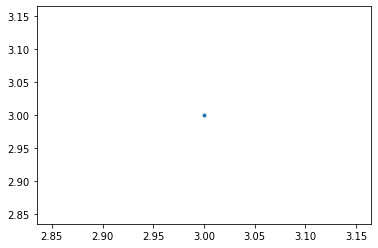

In [ ]:
plt.plot(3,3,'.')


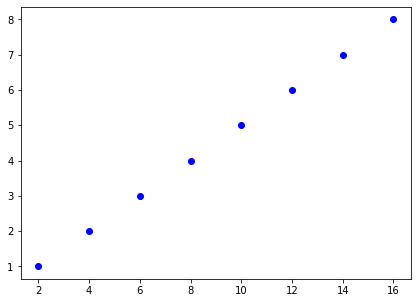

In [ ]:
x = np.array([2,4,6,8,10,12,14,16])
y = x/2

plt.figure(figsize=(7,5))
plt.scatter(x, y, c='blue') 

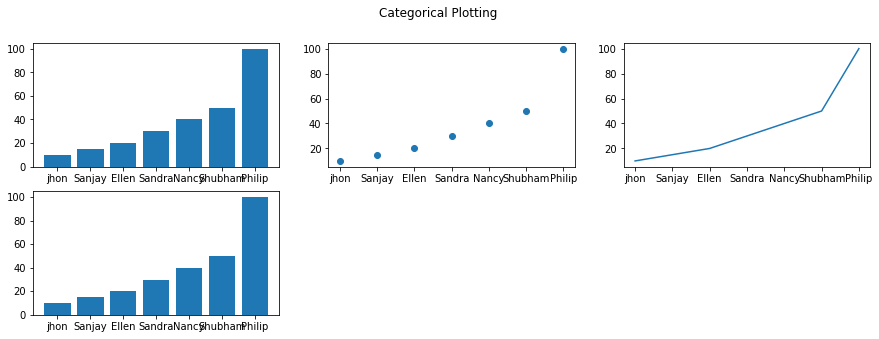

In [ ]:
names = ['jhon', 'Sanjay', 'Ellen','Sandra','Nancy','Shubham','Philip']
scores = [10,15,20,30,40,50,100]

plt.figure(figsize=(15, 5))

plt.subplot(231)        
plt.bar(names, scores)

plt.subplot(232)
plt.scatter(names, scores)

plt.subplot(233)
plt.plot(names, scores)

plt.subplot(234)
plt.bar(names, scores)


plt.suptitle('Categorical Plotting')       #you can give titles,xlabels and ylabels to each of the plots as well
plt.show()

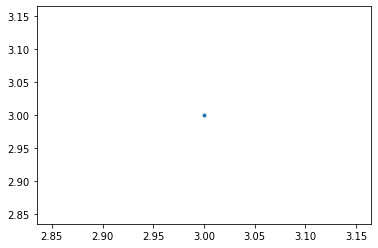

In [ ]:
import seaborn as sns
plt.plot(3,3,'.')


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


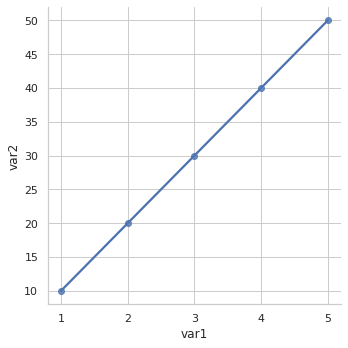

In [ ]:
import seaborn as sns

x = {'var1':[1,2,3,4,5],'var2':[10,20,30,40,50],}
df = pd.DataFrame(x)
sns.set_theme(style="whitegrid")
sns.lmplot('var1','var2',data=df)
plt.show()



In [ ]:
xx=np.random.randint(0,10,100)
yy=np.random.randint(0,10,100)
#zz = pd.DataFrame(x,index=y)
print(xx)
#sns.set_theme(style="dark")
#sns.distplot(x, kde = False)
#sns.distplot.hist()
#sns.displot(x)

[6 4 4 8 9 5 6 3 1 8 1 6 1 9 7 2 4 6 0 9 4 9 3 0 7 7 0 8 2 6 6 0 5 4 1 2 1
 8 3 5 7 9 0 2 8 6 0 0 6 5 9 7 1 7 4 2 6 3 6 9 3 0 6 2 5 0 9 1 9 2 5 7 0 5
 0 8 0 8 0 9 6 8 0 5 3 6 1 3 4 5 6 2 4 9 1 9 1 1 6 6]


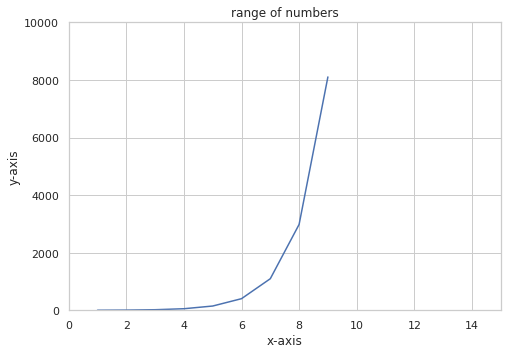

In [ ]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1]) #The calling signature of add_axes is add_axes(rect), where rect is a list [x0, y0, width, height] denoting the lower left point of the new axes in figure coodinates (x0,y0) and its width and height. So the axes is positionned in absolute coordinates on the canvas

x = np.arange(1,10)
a1.plot(x, np.exp(x),'b')

a1.set_title('range of numbers')

#explicitly set x and y limits
plt.ylim(0,10000)
plt.xlim(0,15)

#explicitly set x and y labels
plt.xlabel("x-axis") 
plt.ylabel('y-axis')
plt.show()

#Statistics

In [ ]:
import statistics
data = [25,25,27,27,30]
print(np.mean(data)) #média
print(np.median(data)) # mediana
print(statistics.mode(data)) #mode
#variation, variância
print(np.std(data)) #standart deviation , desvio padrão
#desvio padrão de distribuição de frequencia
# coefficient of variation, CV = std/mean

26.8
27.0
25
1.8330302779823362


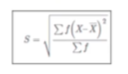 #desvio padrão de distribuição de frequencia

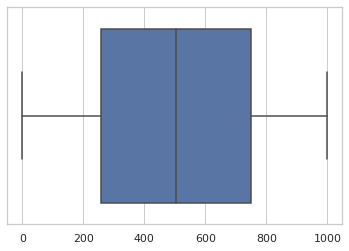

In [ ]:
import seaborn as sns
import numpy as np
sns.boxplot(x= np.random.randint(0,1000,1000))

In [ ]:
#normal distribution = gauss
x = {'var1':[1,2,3,4,5],'var2':[-15,-20,-30,-40,-500]}
df = pd.DataFrame(x)
print(df.corr())


          var1      var2
var1  1.000000 -0.738066
var2 -0.738066  1.000000
